In [9]:
# Esempio tratto da: https://swcarpentry.github.io/python-novice-inflammation

# Studiamo infiammazioni in pazienti che stanno provando un nuovo trattamento per l'artrite
# Abbiamo 60 pazienti, con il loro livello di infiammazione registrato per 40 giorni. 

# Analizzare le registrazioni per capire come funziona questo nuovo trattamento.

# Ad esempio:
#   - Vogliamo calcolare il valore medio giorno per giorni su tutti i pazienti
#   - Vogliamo visualizzare i risultati dello studio

# FORMATO DEI DATI
# Nei vari file inflammation-01.csv, inflammation-02.csv, ecc ci sono i dati di vari studi condotti
# su 60 pazienti in periodi da 40 giorni. In ogni file:

#    - Ogni riga contiene info per un singolo paziente,
#    - Le colonne rappresentano i 40 giorni

import numpy

In [26]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
data

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [27]:
# Attenzione, Python conta sempre da zero
print(f"Dimensioni: {data.shape}")
print(f"Primo valore, riga zero e colonna zero: {data[0, 0]}")
print(f"Valore a riga due e colonna tre:, {data[2, 3]}")


Dimensioni: (60, 40)
Primo valore, riga zero e colonna zero: 0.0
Valore a riga due e colonna tre:, 3.0


In [28]:
# Slicing: riferirsi a un sottoinsieme dei dati
data[0:2, 0:4] # righe 0, 1 -- colonne 0, 1 , 2 , 3


array([[0., 0., 1., 3.],
       [0., 1., 2., 1.]])

In [29]:
# Valore mediano dei dati
numpy.mean(data)

6.14875

In [30]:
maxval, minval, stdval = numpy.max(data), numpy.min(data), numpy.std(data)

print('Valore massimo di infiammazione:', maxval)
print('Valore minimo di infiammazione:', minval)
print('Deviazione standard::', stdval)

Valore massimo di infiammazione: 20.0
Valore minimo di infiammazione: 0.0
Deviazione standard:: 4.613833197118566


In [31]:
paziente0 = data[0, :] # 0 per indicare la prima riga (rows), lascio vuoti i parametri per colonna per prendere tutti i valori (columns)
print('Infiammazione massima per il paziente 0:', numpy.max(paziente0))


Infiammazione massima per il paziente 0: 18.0


In [32]:
# Valore medio tra tutti i valori, colonna per colonna
# Questo, per ogni colonna, ci mostra il valore medio - cioè infiammazione media giornaliera
media_giornaliera = numpy.mean(data, axis=0)
print(media_giornaliera)

[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]


In [33]:
# Vediamo infatti che ha 40 valori, uno per giorno
print(media_giornaliera.shape)


(40,)


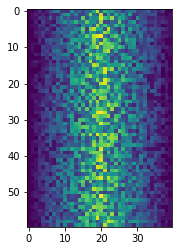

In [34]:
# Visualizziamo il nostro dataset
import matplotlib.pyplot
image = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show()


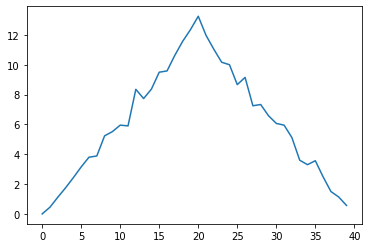

In [35]:
# Visualizziamo la media giornaliera
ave_plot = matplotlib.pyplot.plot(media_giornaliera)
matplotlib.pyplot.show()

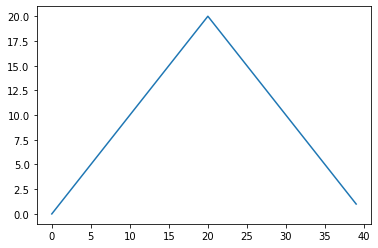

In [36]:
# Visualizziamo il massimo giornaliero
max_plot = numpy.max(data, axis=0)
matplotlib.pyplot.plot(max_plot)
matplotlib.pyplot.show()

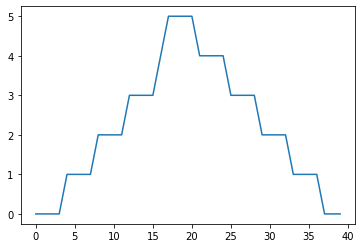

In [37]:
# Visualizziamo il minimo giornaliero
max_plot = numpy.min(data, axis=0)
matplotlib.pyplot.plot(max_plot)
matplotlib.pyplot.show()

In [38]:
# Facciamolo per tutti i file
import glob

print(glob.glob('data/inflammation*.csv'))

['data/inflammation-05.csv', 'data/inflammation-11.csv', 'data/inflammation-10.csv', 'data/inflammation-04.csv', 'data/inflammation-12.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-03.csv', 'data/inflammation-02.csv', 'data/inflammation-01.csv', 'data/inflammation-09.csv', 'data/inflammation-08.csv']


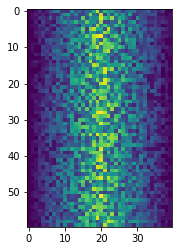

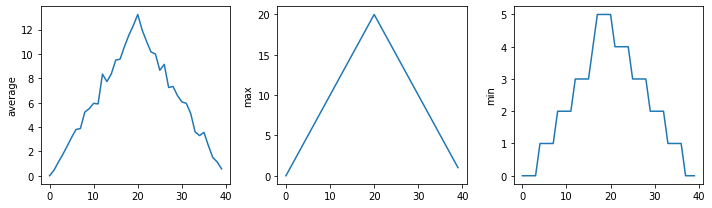

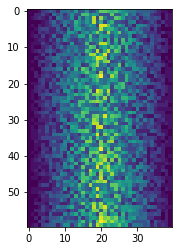

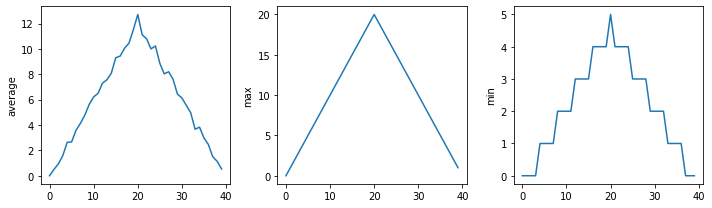

In [56]:
filenames = sorted(glob.glob('data/inflammation*.csv'))

def visualize(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    matplotlib.pyplot.imshow(data)
    matplotlib.pyplot.show()
    
    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

# Vediamo se funziona sui primi 2
for filename in filenames[:2]:
    visualize(filename)


In [57]:
# Notiamo che i dati sembrano avere qualche problema.
# Alcuni dataset hanno il massimo che sale di 1 ogni giorno, è un comportamento sospetto...
# Altri hanno un valore minimo costante a zero...

# Proviamo a scrivere una funzione che identifica questi problemi, per "pulire" i dati
# e non considerare i dataset che non ci sembrano corretti - hanno probabilmente errori in fase
# di raccolta dati.

def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
        print('Il massimo sale di 1 ogni giorno, sospetto!')
    elif numpy.sum(numpy.min(data, axis=0)) == 0:
        print('La somma dei valori minimi è zero, sospetto!')
    else:
        print('Seems OK!')


------------------------------------------------------------
data/inflammation-01.csv


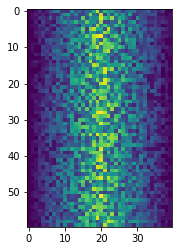

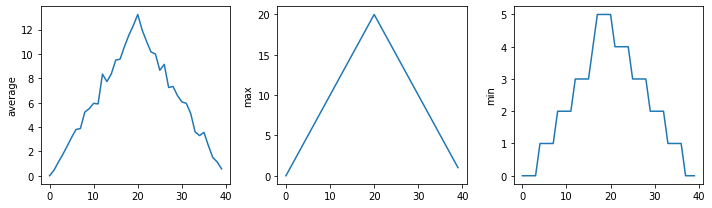

Il massimo sale di 1 ogni giorno, sospetto!


------------------------------------------------------------
data/inflammation-02.csv


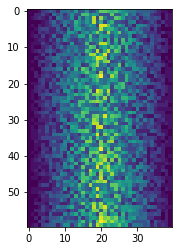

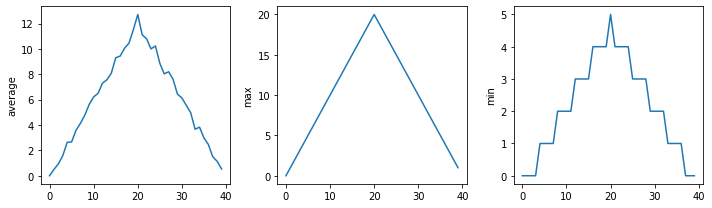

Il massimo sale di 1 ogni giorno, sospetto!


------------------------------------------------------------
data/inflammation-03.csv


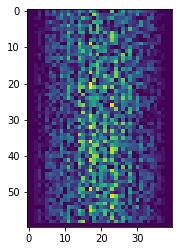

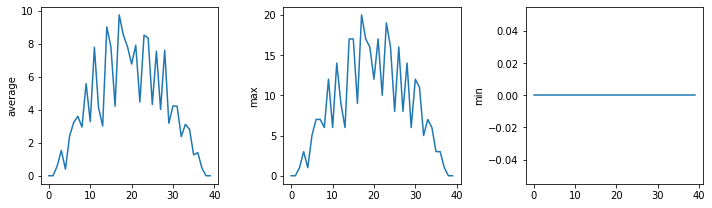

La somma dei valori minimi è zero, sospetto!




In [58]:
for filename in filenames[:3]:
    print("------------------------------------------------------------")
    print(filename)
    visualize(filename)
    detect_problems(filename)
    print()
    print()